<a href="https://colab.research.google.com/github/abdinegara783/FindIT2023/blob/Experiment/Model_Building_and_Hyperparameter_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#membaca Dataset ang telah dipraprocess sebelumnya
Path_df_TrainingFeature='/content/drive/MyDrive/DataFinditUGM/df_TrainingFeatures.csv'
Path_df_TrainingLabel  ='/content/drive/MyDrive/DataFinditUGM/training_set_labels.csv'


In [2]:
# Membaca dataset dari file tanpa mempertahankan kolom indeks
df_TrainingFeature = pd.read_csv(Path_df_TrainingFeature, index_col=False)
df_TrainingLabel = pd.read_csv(Path_df_TrainingLabel, index_col=False)


In [3]:
def hapus_kolom(df, kolom):
    """Fungsi untuk menghapus satu atau beberapa kolom dari DataFrame"""
    df_baru = df.drop(columns=kolom)
    return df_baru
df_TrainingFeature= hapus_kolom(df_TrainingFeature,'respondent_id')
df_TrainingLabel= hapus_kolom(df_TrainingLabel,'respondent_id')


# EDA

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def visualize_correlation(dataframe, input_vars, output_var):
    # Menggabungkan input_vars dan output_var menjadi satu dataframe
    df = dataframe[input_vars + [output_var]]

    # Menghitung matriks korelasi
    correlation_matrix = df.corr()

    # Menggunakan heatmap dari Seaborn untuk memvisualisasikan korelasi
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

    # Menampilkan plot
    plt.show()

# Contoh penggunaan
data = pd.DataFrame({
    'Input1': [1, 2, 3, 4, 5],
    'Input2': [2


In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df, target_column, test_size=0.2, random_state=42):
    """Fungsi untuk membagi data menjadi data latih dan data uji"""
    X = df
    y = target_column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test= split_data(df_TrainingFeature, df_TrainingLabel)

In [ ]:
#X_train=np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Membuat objek XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter Terbaik:")
print(grid_search.best_params_)



Hyperparameter Terbaik:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
grid_search.best_params_={'learning_rate': 0.001, 'max_depth': 50, 'n_estimators': 500}

In [ ]:
# Membuat model XGBoost dengan hyperparameter terbaik
best_xgb_model = xgb.XGBClassifier()

# Melatih model dengan data latih
best_xgb_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = best_xgb_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 66.47%


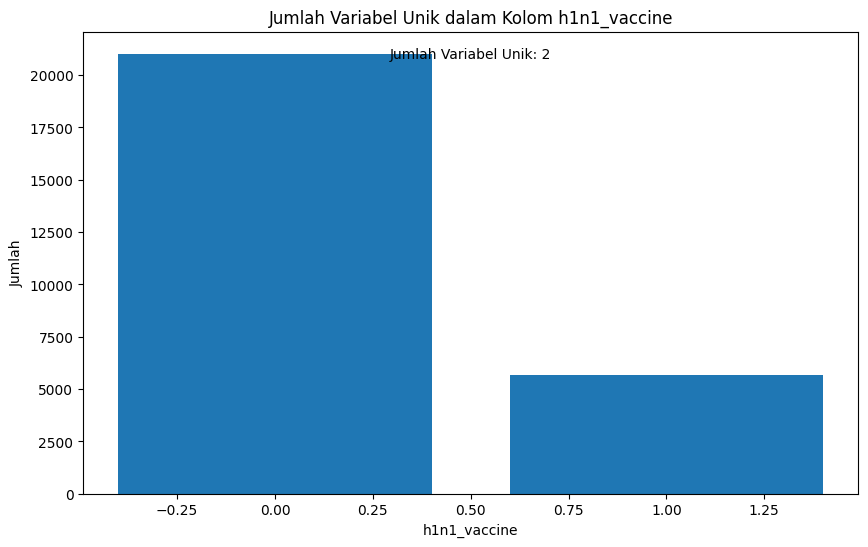

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_unique_values(dataframe, column):
    unique_values = dataframe[column].nunique()
    value_counts = dataframe[column].value_counts()

    # Membuat plot
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values)

    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')

    # Menambahkan judul plot
    plt.title(f'Jumlah Variabel Unik dalam Kolom {column}')

    # Menampilkan jumlah variabel unik sebagai teks pada plot
    plt.text(0.5, 0.95, f'Jumlah Variabel Unik: {unique_values}', ha='center', va='center', transform=plt.gca().transAxes)

    # Menampilkan plot
    plt.show()

# Contoh penggunaan

visualize_unique_values(df_TrainingLabel, 'h1n1_vaccine')


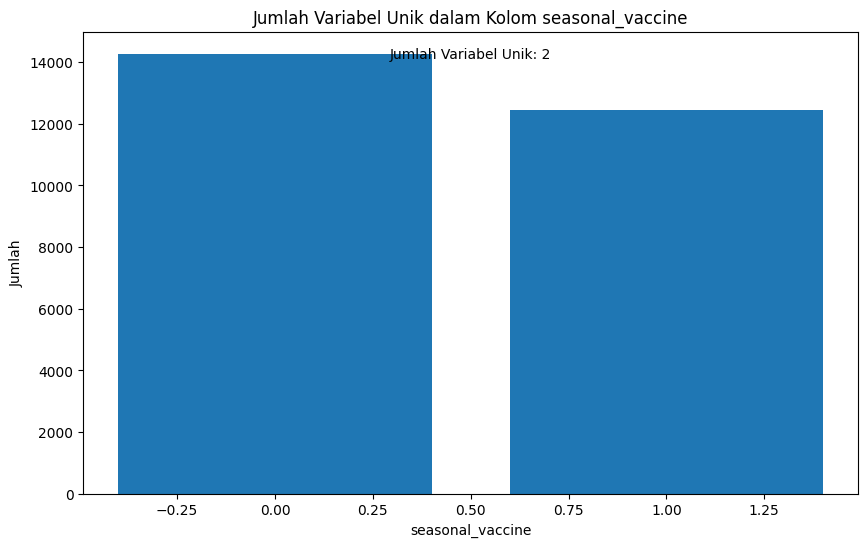

In [ ]:
visualize_unique_values(df_TrainingLabel, 'seasonal_vaccine')

In [ ]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

def objective_function(X, y, feature_subset):
    model = RandomForestClassifier()
    scores = cross_val_score(model, X[:, feature_subset], y, cv=5, scoring='f1')
    return np.mean(scores)

def binary_bat_algorithm(X, y, n_bats=10, n_iterations=100, a=0.9, r0=0.5):
    n_features = X.shape[1]
    bats = np.random.randint(0, 2, (n_bats, n_features))
    velocities = np.random.uniform(-1, 1, (n_bats, n_features))
    frequencies = np.random.uniform(0, 2, n_bats)
    best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    for _ in range(n_iterations):
        for i, bat in enumerate(bats):
            velocities[i] += (bat - best_bat) * frequencies[i]
            new_bat = (bat + velocities[i]).clip(0, 1)
            new_bat = (np.random.rand(n_features) < new_bat).astype(int)

            if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                bats[i] = new_bat

            if np.random.rand() > r0:
                new_bat = best_bat + np.random.uniform(-a, a, n_features)
                new_bat = (np.random.rand(n_features) < new_bat).astype(int)

                if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                    bats[i] = new_bat

        best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    # Menghitung persentase fitur yang terpilih
    feature_percentage = np.sum(best_bat) / n_features * 100

    return best_bat, feature_percentage

# Contoh penggunaan

best_bat, feature_percentage = binary_bat_algorithm(df_TrainingFeature.values, df_TrainingLabel['seasonal_vaccine'].values)
print("Persentase fitur terpilih: {:.2f}%".format(feature_percentage))
print("Fitur terpilih: ", np.where(best_bat == 1)[0])


KeyboardInterrupt: ignored

In [ ]:
df_TrainingLabel

In [ ]:
y_test

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 1]])